## Movie Industry  

Every year, a variety of production studios release movies. Every one of these movies has a different budget. 
In this analysis, our goal is to identify the elements that contributed to the movie's great box office performance.

<img src="Film-Industry.jpg" width="800" height="100">

### Summary of Findings

- Votes and budget have the highest correlation to gross earning in movies.
- Company does not seem to have much impact on gross revenue at all. 
- Movies with a "R" rating are the most common.
- Comedy is the most popular genre.
- The most accomplished writer and director is Woody Allen.
- Nicolas Cage starred in 40 films.
- On December 25, 2008, seven movies were released.
- United States released the most movies.


### Dataset Overview

The data source for this analysis is obtained from Kaggle. You can find it [here](https://www.kaggle.com/datasets/danielgrijalvas/movies).

### Data Dictionary

The dataset has 15 columns and 7668 movies released between 1980 and 2020.

Each movie has the following variables:

| Variables | Description |
| :--- | :--- |
| budget | the budget of a movie. Some movies don't have this, so it appears as 0 |
| company | the production company |
| country | country of origin |
| director | the director |
| genre | main genre of the movie |
| gross | revenue of the movie |
| name | name of the movie |
| rating | rating of the movie (R, PG, etc.) |
| released | release date  and country |
| runtime | duration of the movie |
| score | IMDb user rating |
| votes | number of user votes |
| star | main actor/actress |
| writer | writer of the movie |
| year | year of release |

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create\n",

# set maximum 100 rows to display 
pd.set_option('display.max_rows', 100)


### Data Exploration


In [2]:
# Import dataset

raw_df = pd.read_csv (r'movies.csv')

raw_df.shape


(7668, 15)

In [3]:
# Explore dataset 

raw_df.head ()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Let's see if there is any missing data

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
# Percentage of missing data

for col in raw_df.columns:
    pct_missing = np.mean (raw_df[col].isnull())
    print ('{} - {}%'.format(col, pct_missing))
    

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [6]:
# Number of missing values in each column

raw_df.isnull().sum()


name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [7]:
# Finding duplicates - movie with the same name 

duplicated_movies = raw_df[raw_df.duplicated('name')]

duplicated_movies.shape[0]

duplicated_movies

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
1360,The Bear,PG,Adventure,1988,"October 27, 1989 (United States)",7.7,17000.0,Jean-Jacques Annaud,James Oliver Curwood,Tchéky Karyo,France,NaN,31753898.0,Price,96.0
1836,Impulse,R,Crime,1990,"April 6, 1990 (United States)",5.7,1200.0,Sondra Locke,John DeMarco,Theresa Russell,United States,9000000.0,2544504.0,Warner Bros.,109.0
2022,Paradise,PG-13,Drama,1991,"October 4, 1991 (United States)",6.7,2700.0,Mary Agnes Donoghue,Mary Agnes Donoghue,Melanie Griffith,United States,NaN,18634643.0,Grand Highway Productions,111.0
2104,Forever Young,PG,Drama,1992,"December 16, 1992 (United States)",6.3,45000.0,Steve Miner,J.J. Abrams,Mel Gibson,United States,NaN,127956187.0,Warner Bros.,102.0
2368,Dream Lover,R,Drama,1993,"May 6, 1994 (United States)",6.2,4500.0,Nicholas Kazan,Nicholas Kazan,James Spader,United States,NaN,256264.0,PolyGram Filmed Entertainment,103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7526,The Kid,R,Biography,2019,"March 8, 2019 (United States)",5.9,7400.0,Vincent D'Onofrio,Vincent D'Onofrio,Jake Schur,United States,8000000.0,1561698.0,Mimran Schur Pictures,100.0
7529,Child's Play,R,Drama,2019,"June 21, 2019 (United States)",5.8,47000.0,Lars Klevberg,Tyler Burton Smith,Tim Matheson,Canada,10000000.0,44907074.0,Orion Pictures,90.0
7536,Shaft,R,Action,2019,"June 14, 2019 (United States)",6.4,48000.0,Tim Story,Ernest Tidyman,Samuel L. Jackson,United States,35000000.0,21360215.0,Davis Entertainment,111.0
7556,After the Wedding,PG-13,Drama,2019,"November 1, 2019 (United Kingdom)",6.3,6700.0,Bart Freundlich,Bart Freundlich,Julianne Moore,United States,NaN,2790019.0,Sony Pictures Classics,112.0


#### Observations

- There are 7668 rows and 15 columns in our dataset. A few columns include integers, whereas the majority of the columns contain object or string data.
- Columns for the budget and gross are kept as decimal numbers.
- A few columns (rating, released, score, votes, writer, star, country, budget, gross, company, and runtime) include null values; these null values represent less than 3% of each column's total data.
- The same name appears in 85 different movies. Movies having the same name cannot, however, be categorised as duplicates. This is due to the possibility that they were recently remakes or foreign productions.
- Some movies have different 'year' and 'released' data.

We will try to resolve these issues as we explore more to avoid future problems.

### Data Cleaning 
#### 1. Removing Rows with Missing Values

Comparing a movie's budget to its gross is essential when determining its commercial success. Additionally, a movie's quality can be measured by its rating and votes. All the movies with missing values in the budget, gross, score, and votes columns will be removed.


In [8]:
df = raw_df.dropna(subset=['budget', 'gross', 'score', 'votes']).copy()

df.shape


(5436, 15)

#### 2. Filling in the blanks

Let's try to fill in some of the blanks


In [9]:
# 'Rating' column

print(df['rating'].unique())


['R' 'PG' 'G' 'NC-17' 'Approved' 'Not Rated' 'PG-13' nan 'Unrated' 'X'
 'TV-MA']


In [10]:
print (df['rating'].value_counts())


R            2597
PG-13        1730
PG            909
G             111
Not Rated      44
Unrated        17
NC-17          12
TV-MA           2
Approved        1
X               1
Name: rating, dtype: int64


In [11]:
# Update the 'rating' column 
# - 'nan' to 'Not Rated'
# - 'Unrated' to 'Not Rated'

df['rating'] = df['rating'].replace(np.nan, 'Not Rated', regex=True)

df['rating'] = df['rating'].replace('Unrated', 'Not Rated', regex=True)

print (df['rating'].value_counts())


R            2597
PG-13        1730
PG            909
G             111
Not Rated      73
NC-17          12
TV-MA           2
Approved        1
X               1
Name: rating, dtype: int64


In [12]:
# How much more null values are in the dataset??

for col in df.columns:
    pct_missing = np.mean (df[col].isnull())
    print ('{} - {}%'.format(col, pct_missing))
    

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0001839587932303164%
budget - 0.0%
gross - 0.0%
company - 0.0003679175864606328%
runtime - 0.0001839587932303164%


In [13]:
# 'Country', 'Company' and 'Runtime' 
# 
# Replacing null values with empty strings in these columns.

df.fillna('0', inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5436 non-null   object 
 1   rating    5436 non-null   object 
 2   genre     5436 non-null   object 
 3   year      5436 non-null   int64  
 4   released  5436 non-null   object 
 5   score     5436 non-null   float64
 6   votes     5436 non-null   float64
 7   director  5436 non-null   object 
 8   writer    5436 non-null   object 
 9   star      5436 non-null   object 
 10  country   5436 non-null   object 
 11  budget    5436 non-null   float64
 12  gross     5436 non-null   float64
 13  company   5436 non-null   object 
 14  runtime   5436 non-null   object 
dtypes: float64(4), int64(1), object(10)
memory usage: 679.5+ KB


#### 3. Changing the data's type to make it easier to work with


In [14]:
df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5436 non-null   object 
 1   rating    5436 non-null   object 
 2   genre     5436 non-null   object 
 3   year      5436 non-null   int64  
 4   released  5436 non-null   object 
 5   score     5436 non-null   float64
 6   votes     5436 non-null   float64
 7   director  5436 non-null   object 
 8   writer    5436 non-null   object 
 9   star      5436 non-null   object 
 10  country   5436 non-null   object 
 11  budget    5436 non-null   int64  
 12  gross     5436 non-null   int64  
 13  company   5436 non-null   object 
 14  runtime   5436 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 679.5+ KB


#### 4. Create a new column for the correct year 

Some movies have different 'year' and 'released' data, they should be the same. Let's take the 4 digits value from 'released' and put them in the new column 'year_correct'

In [15]:
# Search the text in 'released' for four consecutive numbers, such as '2019' in 'July 19, 2019 (United States)'.

df['year_correct'] = df['released'].str.extract(pat='([0-9]{4})').astype(int)

df['year_correct'][:5]


0    1980
1    1980
2    1980
3    1980
4    1980
Name: year_correct, dtype: int32

#### 5. Find duplicate rows in the dataframe on all columns

In [16]:
# Making sure there are no duplicated data

duplicates = df[df.duplicated()]

print ('Duplicated Rows :')
duplicates


Duplicated Rows :


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct


There are no duplicate in this dataset!!

If there are duplicated rows, we can use the following codes to remove them

In [17]:
## df.drop_duplicates()


#### 6. Dropping Duplicates

We now have the issue that some company name could be registered in a slightly different version. Therefore, we need to eliminate these duplicates.


In [18]:
df["company"] = df["company"].drop_duplicates().sort_values()

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 0 to 7652
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          5436 non-null   object 
 1   rating        5436 non-null   object 
 2   genre         5436 non-null   object 
 3   year          5436 non-null   int64  
 4   released      5436 non-null   object 
 5   score         5436 non-null   float64
 6   votes         5436 non-null   float64
 7   director      5436 non-null   object 
 8   writer        5436 non-null   object 
 9   star          5436 non-null   object 
 10  country       5436 non-null   object 
 11  budget        5436 non-null   int64  
 12  gross         5436 non-null   int64  
 13  company       1482 non-null   object 
 14  runtime       5436 non-null   object 
 15  year_correct  5436 non-null   int32  
dtypes: float64(2), int32(1), int64(3), object(10)
memory usage: 700.7+ KB


"company" had 5436 non-null counts prior to dropping the duplicates, but now only has 1482.

#### Understanding the values of the objects in our dataset

In [19]:
# Some information on the data

df.describe(include=['object']).T

,count,unique,top,freq
name,5436,5351,Hercules,3
rating,5436,9,R,2597
genre,5436,15,Comedy,1496
released,5436,2566,"January 25, 2002 (United States)",7
director,5436,2069,Woody Allen,33
writer,5436,3215,Woody Allen,32
star,5436,1852,Nicolas Cage,40
country,5436,51,United States,4326
company,1482,1482,Warner Bros.,1
runtime,5436.0,128.0,101.0,158.0


#### Observation

1. Movies with a "R" rating are the most common.
2. "Comedy" is the most popular genre.
3. The most accomplished writer and director is "Woody Allen."
4. Nicolas Cage starred in 40 films.
5. On December 25, 2008, seven movies were released.
6. United States released the most movies.

### Correlation 

Let's start looking at correlation between numerical columns.

What most affect the ticket sales? Perhaps a major factor in how much money movies make is their budget? 

Some of the columns are not in number format. So we cannot include those data into the correlation matrix. We will address this issue later.

In [20]:
df.corr(method='pearson') # pearson, spearman, kendall"

,year,score,votes,budget,gross,year_correct
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.998641
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.061029
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.202883
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.320245
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.268626
year_correct,0.998641,0.061029,0.202883,0.320245,0.268626,1.000000


The result above demonstrates a strong correlation between budget and gross revenue as well as a moderately strong correlation between votes and revenue.

#### Heatmap

Visualize with a heatmap for deeper insight.

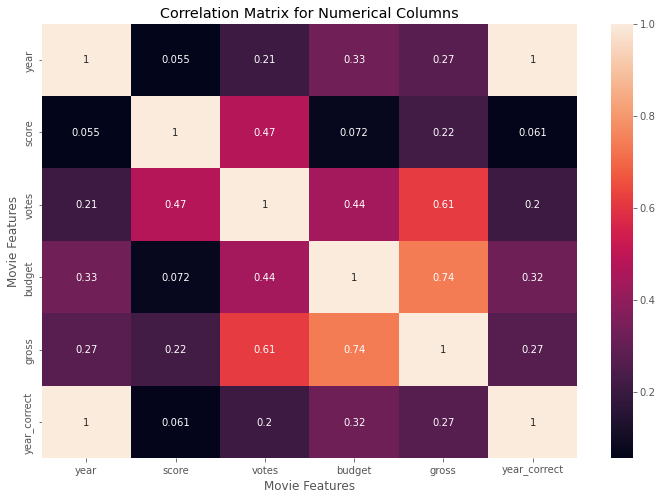

In [21]:
# Visualize with a heatmap for deeper insight
#

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numerical Columns')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

#### Categorized String Objects into Numeric Data

As indicated earlier, there was a problem with our DataFrame's non-numeric data. They cannot simply be a part of the correlation matrix. Each data point will therefore be given a numerical code by being converted into a "category" data type. We can then use these numbers to calculate the correlation matrix.


In [22]:
df_number = df.copy()

for col_name in df_number.columns:
    if(df_number[col_name].dtype == 'object'):
        df_number[col_name] = df_number[col_name].astype('category')
        df_number[col_name] = df_number[col_name].cat.codes
        
df_number

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,4706,6,6,1980,1308,8.4,927000.0,1800,2841,700,47,19000000,46998772,1433,77,1980
1,3943,6,1,1980,1131,5.8,65000.0,1581,1160,215,48,4500000,58853106,455,35,1980
2,3654,4,0,1980,1363,8.7,1200000.0,759,1822,1161,48,18000000,538375067,950,55,1980
3,205,4,4,1980,1131,7.7,221000.0,891,1416,1478,48,3500000,83453539,1115,19,1980
4,734,6,4,1980,1174,7.3,108000.0,721,352,272,48,6000000,39846344,1090,29,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,416,6,0,2020,907,6.6,140000.0,17,2397,1819,48,90000000,426505244,-1,55,2020
7649,3569,4,0,2020,715,6.5,102000.0,854,2316,148,48,85000000,319715683,-1,30,2020
7650,1156,4,1,2020,907,5.6,53000.0,1814,2836,1474,48,175000000,245487753,-1,32,2020
7651,3992,4,1,2020,760,6.8,42000.0,296,2096,641,7,135000000,111105497,13,31,2020


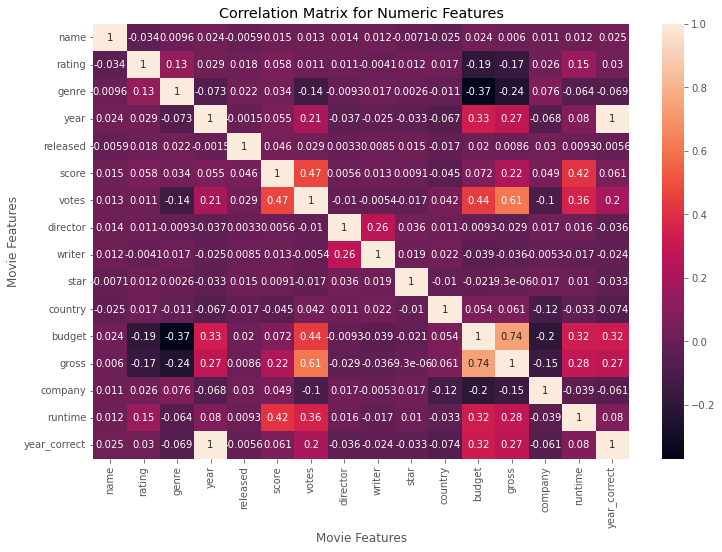

In [23]:
# Let's plot another Heatmap with the newly categorized data.

correlation_matrix = df_number.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

The result above demonstrates a strong correlation between budget and gross revenue as well as a moderately strong correlation between votes and revenue.

#### Viewing correlation between all data by using 'unstacking'

In [24]:
# set maximum rows to display 
pd.set_option('display.max_rows', None)

# Look at the correlation pairs 

corr_pairs = df_number.corr().unstack()

# Sort the correlation values

sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre         budget         -0.368900
budget        genre          -0.368900
genre         gross          -0.244380
gross         genre          -0.244380
company       budget         -0.198268
budget        company        -0.198268
rating        budget         -0.188022
budget        rating         -0.188022
rating        gross          -0.171015
gross         rating         -0.171015
company       gross          -0.147805
gross         company        -0.147805
genre         votes          -0.136457
votes         genre          -0.136457
country       company        -0.116036
company       country        -0.116036
              votes          -0.099772
votes         company        -0.099772
year_correct  country        -0.073732
country       year_correct   -0.073732
year          genre          -0.073026
genre         year           -0.073026
year_correct  genre          -0.068848
genre         year_correct   -0.068848
company       year           -0.068220
year          company    

In [25]:
# Which columns have the correlation higher than 0.5?
#

sorted_pairs[((sorted_pairs) > 0.5) & ((sorted_pairs) < 1.0)]


votes         gross           0.614904
gross         votes           0.614904
              budget          0.740395
budget        gross           0.740395
year          year_correct    0.998641
year_correct  year            0.998641
dtype: float64

#### Observation

Votes and budget have the highest correlation to gross earning in movies.
Company does not seem to have much impact on gross revenue at all. 

### Data Visualization


#### Plotting the two highest correlation found from the dataset
#### Scatterplot ( Budget Vs Gross Revenue )

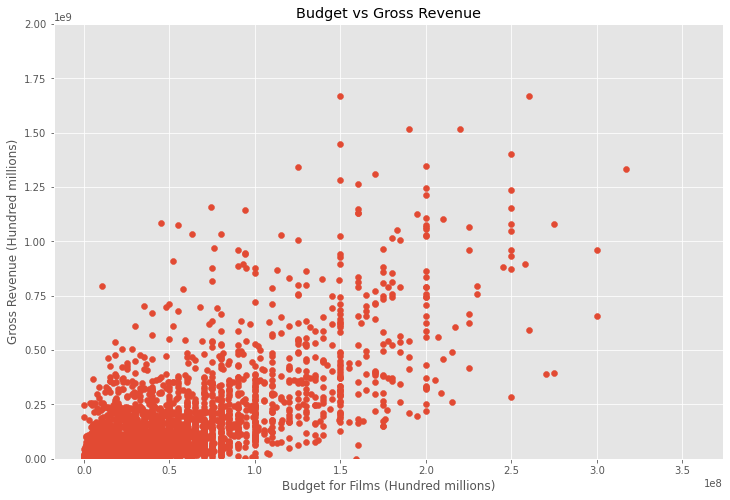

In [26]:
plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Revenue')

plt.xlabel('Budget for Films (Hundred millions)')
           
plt.ylabel('Gross Revenue (Hundred millions)')
plt.ylim([0,2*10**9])

plt.show()


#### Regression Plot ( Budget vs Gross Revenue )

We will create a regression plot with regard to gross revenue in order to obtain a more accurate correlation with the budget.


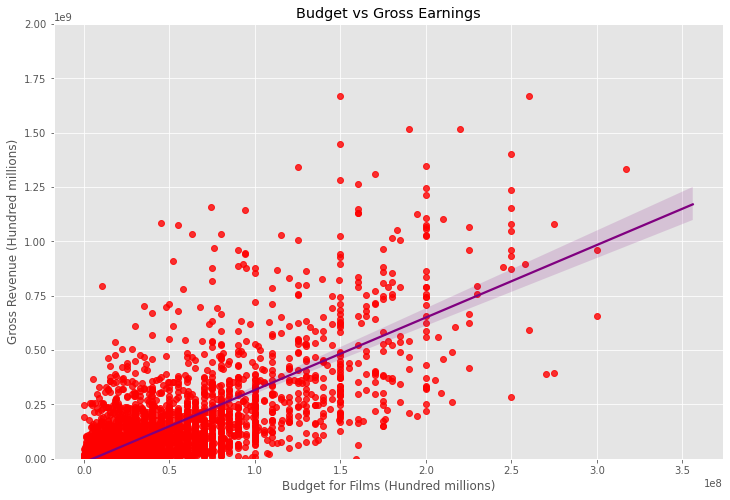

In [27]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'purple'})

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget for Films (Hundred millions)')

plt.ylabel('Gross Revenue (Hundred millions)')
plt.ylim([0,2*10**9])

plt.show()


#### Number of Movies in Each Genre

In [28]:
df_genre = df.groupby(by='genre', as_index=False).agg({'name': pd.Series.nunique})
df_genre = df_genre.sort_values(by=['name'], ascending=False)
df_genre.rename(columns = {'name':'number of movies'}, inplace = True)
df_genre

,genre,number of movies
4,Comedy,1487
0,Action,1394
6,Drama,863
5,Crime,397
1,Adventure,326
3,Biography,312
2,Animation,277
9,Horror,248
8,Fantasy,42
10,Mystery,17


#### Top 10 Movies with the Highest Gross Revenue

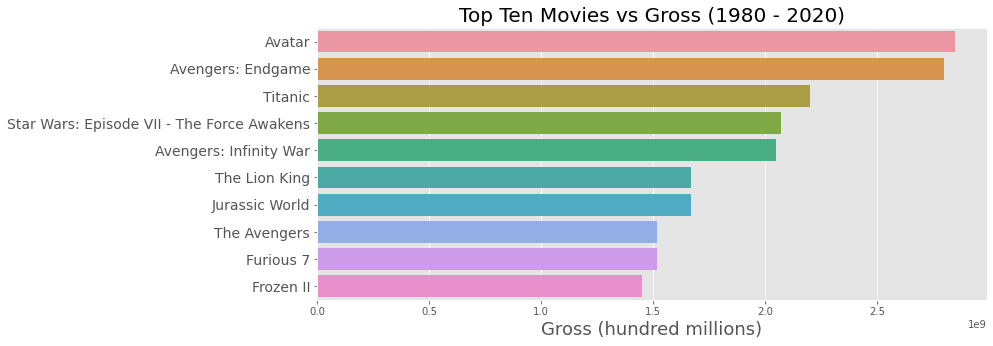

In [29]:
# Let's sort the dataset with the 'gross' column in descending order

gross_df = df.sort_values(by=['gross'], ascending=False)
top10 = gross_df[:10].copy()

plt.figure(figsize=(12,5))

sns.barplot(x = 'gross', y = 'name', data = top10 )

plt.title("Top Ten Movies vs Gross (1980 - 2020)", fontsize=20)

plt.xlabel("Gross (hundred millions)", fontsize=18)

plt.ylabel('')
plt.yticks(fontsize=14)

plt.show()

#### Top 10 Movies with the Highest Budget

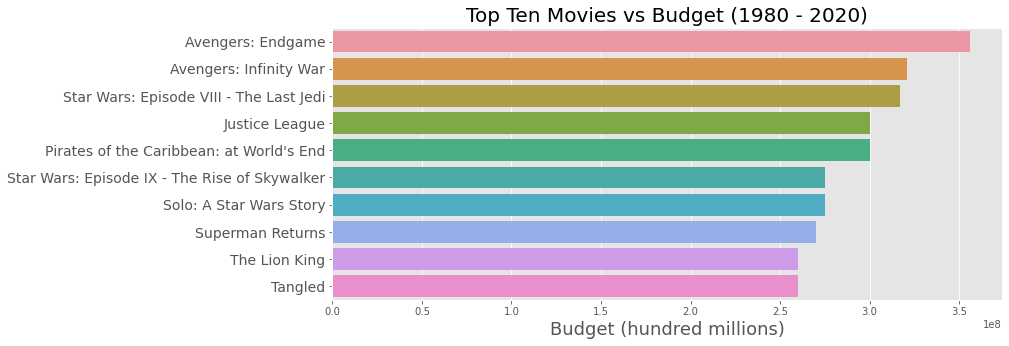

In [30]:
# Let's sort the dataset with the 'budget' column in descending order

budget_df = df.sort_values(by=['budget'], ascending=False)
top10 = budget_df[:10].copy()

plt.figure(figsize=(12,5))

sns.barplot(x = 'budget', y = 'name', data = top10 )

plt.title("Top Ten Movies vs Budget (1980 - 2020)", fontsize=20)

plt.xlabel("Budget (hundred millions)", fontsize=18)

plt.ylabel('')
plt.yticks(fontsize=14)

plt.show()

#### Top 10 Movies with the Highest Score


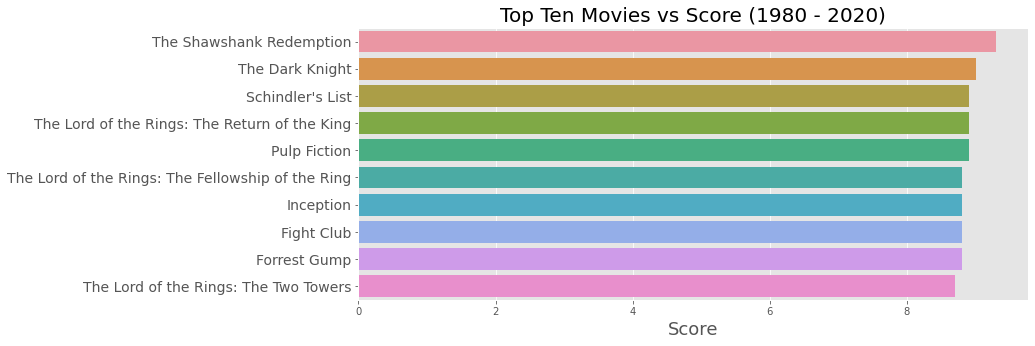

In [31]:
# Let's sort the dataset with the 'Score' column in descending order

score_df = df.sort_values(by=['score'], ascending=False)
top10 = score_df[:10].copy()

plt.figure(figsize=(12,5))

sns.barplot(x = 'score', y = 'name', data = top10 )

plt.title("Top Ten Movies vs Score (1980 - 2020)", fontsize=20)

plt.xlabel("Score", fontsize=18)

plt.ylabel('')
plt.yticks(fontsize=14)

plt.show()


#### The Top Film in Each Genre

In [32]:
genre_grouped = df.groupby('genre')

aggregate_genre = {}

# For each genre, which movie has the highest gross revenue?
for name, group in genre_grouped:
    
    # sort the grouped dataframe
    group.sort_values(by=['gross'], inplace=True, ascending=False)
    
    aggregate_genre[name] = group.iloc[0]['name']

aggregate_genre = pd.Series(aggregate_genre)    
genre_df = pd.DataFrame(data = aggregate_genre, columns = ['Name'])

genre_df


,Name
Action,Avatar
Adventure,Harry Potter and the Deathly Hallows: Part 2
Animation,The Lion King
Biography,Bohemian Rhapsody
Comedy,Mamma Mia!
Crime,Joker
Drama,Titanic
Family,Beauty and the Beast
Fantasy,Sleepy Hollow
Horror,It


#### Top 10 Companies by Budget and Gross Revenue

In [33]:
# First we will make a new dataframe for the company's budget and gross revenue
# and sort by  gross revenue

companies = df.groupby('company')[['budget','gross']].sum()

companies.sort_values(by = 'gross', inplace=True, ascending = False)

# Second we will reset the index and take only the top 10 comapnies

top10c = companies.reset_index()[:10]

top10c

,company,budget,gross
0,Marvel Studios,220000000,1518815515
1,Illumination Entertainment,74000000,1159444662
2,Fairview Entertainment,175000000,966554929
3,B24,245000000,880681519
4,Avi Arad Productions,100000000,856085151
5,Heyday Films,180000000,814044001
6,Chris Morgan Productions,200000000,759056935
7,Jolie Pas,180000000,758411779
8,Marvel Entertainment,170000000,714421503
9,Temple Hill Entertainment,50000000,711025481
